In [1]:
import os
import warnings

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.metrics as metrics

from matplotlib import gridspec
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import tree

from os import system
from IPython.display import Image


warnings.filterwarnings('ignore')                                       # Ignore/Do not display warnings

main_data = pd.read_csv('credit.csv')

In [2]:
main_data.head(10)

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
0,< 0 DM,6,critical,furniture/appliances,1169,unknown,> 7 years,4,4,67,none,own,2,skilled,1,yes,no
1,1 - 200 DM,48,good,furniture/appliances,5951,< 100 DM,1 - 4 years,2,2,22,none,own,1,skilled,1,no,yes
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 years,2,3,49,none,own,1,unskilled,2,no,no
3,< 0 DM,42,good,furniture/appliances,7882,< 100 DM,4 - 7 years,2,4,45,none,other,1,skilled,2,no,no
4,< 0 DM,24,poor,car,4870,< 100 DM,1 - 4 years,3,4,53,none,other,2,skilled,2,no,yes
5,unknown,36,good,education,9055,unknown,1 - 4 years,2,4,35,none,other,1,unskilled,2,yes,no
6,unknown,24,good,furniture/appliances,2835,500 - 1000 DM,> 7 years,3,4,53,none,own,1,skilled,1,no,no
7,1 - 200 DM,36,good,car,6948,< 100 DM,1 - 4 years,2,2,35,none,rent,1,management,1,yes,no
8,unknown,12,good,furniture/appliances,3059,> 1000 DM,4 - 7 years,2,4,61,none,own,1,unskilled,1,no,no
9,1 - 200 DM,30,critical,car,5234,< 100 DM,unemployed,4,2,28,none,own,2,management,1,no,yes


In [3]:
main_data.shape

(1000, 17)

In [4]:
main_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   checking_balance      1000 non-null   object
 1   months_loan_duration  1000 non-null   int64 
 2   credit_history        1000 non-null   object
 3   purpose               1000 non-null   object
 4   amount                1000 non-null   int64 
 5   savings_balance       1000 non-null   object
 6   employment_duration   1000 non-null   object
 7   percent_of_income     1000 non-null   int64 
 8   years_at_residence    1000 non-null   int64 
 9   age                   1000 non-null   int64 
 10  other_credit          1000 non-null   object
 11  housing               1000 non-null   object
 12  existing_loans_count  1000 non-null   int64 
 13  job                   1000 non-null   object
 14  dependents            1000 non-null   int64 
 15  phone                 1000 non-null   o

In [5]:
def ConvertType(fromType, toType):
    for col_name in main_data.columns:
        if main_data[col_name].dtype == fromType:
            main_data[col_name] = main_data[col_name].astype(toType)
        
    main_data.info()
    
ConvertType("object", "category")

# Functions to calculate different metrics

def DisplayConfusionMatrix(model, y_actual, labels=[1,0]):
    y_predict = model.predict(x_test)
    confusion_matrix = metrics.confusion_matrix(y_actual, y_predict, labels=[0, 1])
    confusion_matix_df = pd.DataFrame(
        confusion_matrix,
        index   = [i for i in ["Actual No", "Actual Yes"]],
        columns = [i for i in ["Predicted - No", "Predicted - Yes"]])
    
    group_counts = ["{0:0.0f}".format(value) for value in confusion_matrix.flatten()]
    group_percetages = ["{0:.2%}".format(value) for value in confusion_matrix.flatten()/np.sum(confusion_matrix)]
    
    labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_counts, group_percetages)]
    labels = np.array(labels).reshape(2, 2)
    plt.figure(figsize= (10,7))
    sns.heatmap(confusion_matix_df, annot=labels,fmt='')
    plt.ylabel("True Label")
    plt.xlabel("Predicted Label")
    
def GetMetricsScore(model):
    
    pred_train = model.predict(x_train)
    pred_test  = model.predict(x_test)
    
    train_accuracy = model.score(x_train, y_train)
    test_accuracy  = model.score(x_test, y_test)
    
    train_recall = metrics.recall_score(y_train, pred_train)
    test_recall  = metrics.recall_score(y_test, pred_test)
    
    train_precision = metrics.precision_score(y_train, pred_train)
    test_precision  = metrics.precision_score(y_test, pred_test)
        
    return {
        'Accuracy_Test'   : test_accuracy,
        'Accuracy_Train'  : train_accuracy,
        'Recall_Test'     : test_recall,
        'Recall_Train'    : train_recall,
        'Precision_Test'  : test_precision,
        'Precision_Train' : train_precision
    }
        

def DisplayImportance(model):
    gini_importances = pd.DataFrame(dTree.feature_importances_, columns=["Imp"], index=x_train.columns).sort_values(by = "Imp")
    print(gini_importances)
    
def DisplayImportanceChart(model):
    importances = model.feature_importances_
    indices = np.argsort(importances)

    plt.figure(figsize=(12, 12))
    plt.title('Feature Importance')
    plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
    plt.yticks(range(len(indices)), [list(X.columns)[i] for i in indices])
    plt.xlabel('Relative Importance')
    plt.show()
    
def DisplayScore(model):
    print(f"Training Score :{model.score(x_train, y_train)}")
    print(f"Test Score : {model.score(x_test, y_test)}")
    DisplayRecallScore(model)
    
def PlotTree(model, size = [20, 30]):
    plt.figure(figsize=(size[0],size[1]))
    tree.plot_tree(model, feature_names=feature_names, filled=True, fontsize=9, node_ids=True, class_names=True)
    plt.show()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   checking_balance      1000 non-null   category
 1   months_loan_duration  1000 non-null   int64   
 2   credit_history        1000 non-null   category
 3   purpose               1000 non-null   category
 4   amount                1000 non-null   int64   
 5   savings_balance       1000 non-null   category
 6   employment_duration   1000 non-null   category
 7   percent_of_income     1000 non-null   int64   
 8   years_at_residence    1000 non-null   int64   
 9   age                   1000 non-null   int64   
 10  other_credit          1000 non-null   category
 11  housing               1000 non-null   category
 12  existing_loans_count  1000 non-null   int64   
 13  job                   1000 non-null   category
 14  dependents            1000 non-null   int64   
 15  phone

In [6]:
main_data.head()

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
0,< 0 DM,6,critical,furniture/appliances,1169,unknown,> 7 years,4,4,67,none,own,2,skilled,1,yes,no
1,1 - 200 DM,48,good,furniture/appliances,5951,< 100 DM,1 - 4 years,2,2,22,none,own,1,skilled,1,no,yes
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 years,2,3,49,none,own,1,unskilled,2,no,no
3,< 0 DM,42,good,furniture/appliances,7882,< 100 DM,4 - 7 years,2,4,45,none,other,1,skilled,2,no,no
4,< 0 DM,24,poor,car,4870,< 100 DM,1 - 4 years,3,4,53,none,other,2,skilled,2,no,yes


In [7]:
def CountUniqueValues(col_name):
    print(f"\n\n======Unique Values count for: '{col_name}'========\n\n")
    for unique_col_value in  main_data[col_name].unique().tolist():
        total_count = main_data[col_name].count()
        unique_values_count = main_data[main_data[col_name] == unique_col_value][col_name].count()
        percentage = str(round((unique_values_count/total_count) * 100, 2))
        print(f"{unique_col_value} \t: {unique_values_count} ({percentage}%)")
    print(f"\n\n====================================================\n\n")

In [8]:
for col_name in main_data.columns:
    print(main_data[col_name].value_counts())

unknown       394
< 0 DM        274
1 - 200 DM    269
> 200 DM       63
Name: checking_balance, dtype: int64
24    184
12    179
18    113
36     83
6      75
15     64
9      49
48     48
30     40
21     30
10     28
27     13
60     13
42     11
11      9
20      8
8       7
4       6
7       5
39      5
45      5
14      4
13      4
28      3
33      3
54      2
22      2
16      2
40      1
47      1
26      1
5       1
72      1
Name: months_loan_duration, dtype: int64
good         530
critical     293
poor          88
very good     49
perfect       40
Name: credit_history, dtype: int64
furniture/appliances    473
car                     337
business                 97
education                59
renovations              22
car0                     12
Name: purpose, dtype: int64
1258    3
1262    3
1393    3
1478    3
1275    3
       ..
759     1
760     1
763     1
2812    1
6143    1
Name: amount, Length: 921, dtype: int64
< 100 DM         603
unknown          183
100 - 500 DM

In [9]:
# replace columns with  integers in the appropreate order
replace_struct = {
    "checking_balance"    : {"< 0 DM": 1, "1 - 200 DM": 2, "> 200 DM": 3, "unknown": -1},
    "credit_history"      : {"critical": 1, "poor": 2, "good": 3, "very good": 4, "perfect": 5},
    "savings_balance"     : {"< 100 DM": 1, "100 - 500 DM": 2, "500 - 1000 DM": 3, "> 1000 DM": 4, "unknown": -1},
    "employment_duration" : {"unemployed": 1, "< 1 year": 2, "1 - 4 years": 3, "4 - 7 years":4, "> 7 years": 5},
    "default"             : {"no":0, "yes":1},
    "phone"               : {"no":0, "yes":1}
}

oneHotCols = ["purpose", "housing", "other_credit","job"]

In [10]:
main_data = main_data.replace(replace_struct)
main_data = pd.get_dummies(main_data, columns=oneHotCols)
main_data.head(10)

,checking_balance,months_loan_duration,credit_history,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,existing_loans_count,...,housing_other,housing_own,housing_rent,other_credit_bank,other_credit_none,other_credit_store,job_management,job_skilled,job_unemployed,job_unskilled
0,1,6,1,1169,-1,5,4,4,67,2,...,0,1,0,0,1,0,0,1,0,0
1,2,48,3,5951,1,3,2,2,22,1,...,0,1,0,0,1,0,0,1,0,0
2,-1,12,1,2096,1,4,2,3,49,1,...,0,1,0,0,1,0,0,0,0,1
3,1,42,3,7882,1,4,2,4,45,1,...,1,0,0,0,1,0,0,1,0,0
4,1,24,2,4870,1,3,3,4,53,2,...,1,0,0,0,1,0,0,1,0,0
5,-1,36,3,9055,-1,3,2,4,35,1,...,1,0,0,0,1,0,0,0,0,1
6,-1,24,3,2835,3,5,3,4,53,1,...,0,1,0,0,1,0,0,1,0,0
7,2,36,3,6948,1,3,2,2,35,1,...,0,0,1,0,1,0,1,0,0,0
8,-1,12,3,3059,4,4,2,4,61,1,...,0,1,0,0,1,0,0,0,0,1
9,2,30,1,5234,1,1,4,2,28,2,...,0,1,0,0,1,0,1,0,0,0


In [11]:
main_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   checking_balance              1000 non-null   int64
 1   months_loan_duration          1000 non-null   int64
 2   credit_history                1000 non-null   int64
 3   amount                        1000 non-null   int64
 4   savings_balance               1000 non-null   int64
 5   employment_duration           1000 non-null   int64
 6   percent_of_income             1000 non-null   int64
 7   years_at_residence            1000 non-null   int64
 8   age                           1000 non-null   int64
 9   existing_loans_count          1000 non-null   int64
 10  dependents                    1000 non-null   int64
 11  phone                         1000 non-null   int64
 12  default                       1000 non-null   int64
 13  purpose_business              1000

In [12]:
X = main_data.drop("default", axis=1)
Y = main_data.pop("default")
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

In [13]:
dTree = DecisionTreeClassifier(criterion= 'gini', random_state=1)
dTree.fit(x_train, y_train)

DecisionTreeClassifier(random_state=1)

In [14]:
print(f"Training Score :{dTree.score(x_train, y_train)}")
print(f"Test Score : {dTree.score(x_test, y_test)}")

Training Score :1.0
Test Score : 0.6933333333333334


In [15]:
# check number of positives
Y.sum(axis = 0)

300

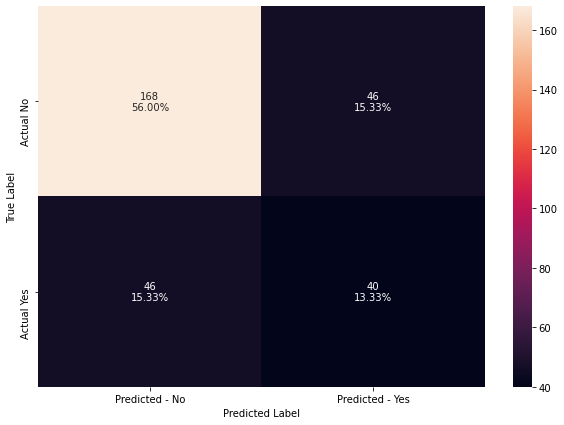

In [16]:
DisplayConfusionMatrix(dTree, y_test)

In [17]:
GetMetricsScore(dTree)

{'Accuracy_Test': 0.6933333333333334,
 'Accuracy_Train': 1.0,
 'Recall_Test': 0.46511627906976744,
 'Recall_Train': 1.0,
 'Precision_Test': 0.46511627906976744,
 'Precision_Train': 1.0}

In [18]:
feature_names = list(X.columns)
print(feature_names)

['checking_balance', 'months_loan_duration', 'credit_history', 'amount', 'savings_balance', 'employment_duration', 'percent_of_income', 'years_at_residence', 'age', 'existing_loans_count', 'dependents', 'phone', 'purpose_business', 'purpose_car', 'purpose_car0', 'purpose_education', 'purpose_furniture/appliances', 'purpose_renovations', 'housing_other', 'housing_own', 'housing_rent', 'other_credit_bank', 'other_credit_none', 'other_credit_store', 'job_management', 'job_skilled', 'job_unemployed', 'job_unskilled']


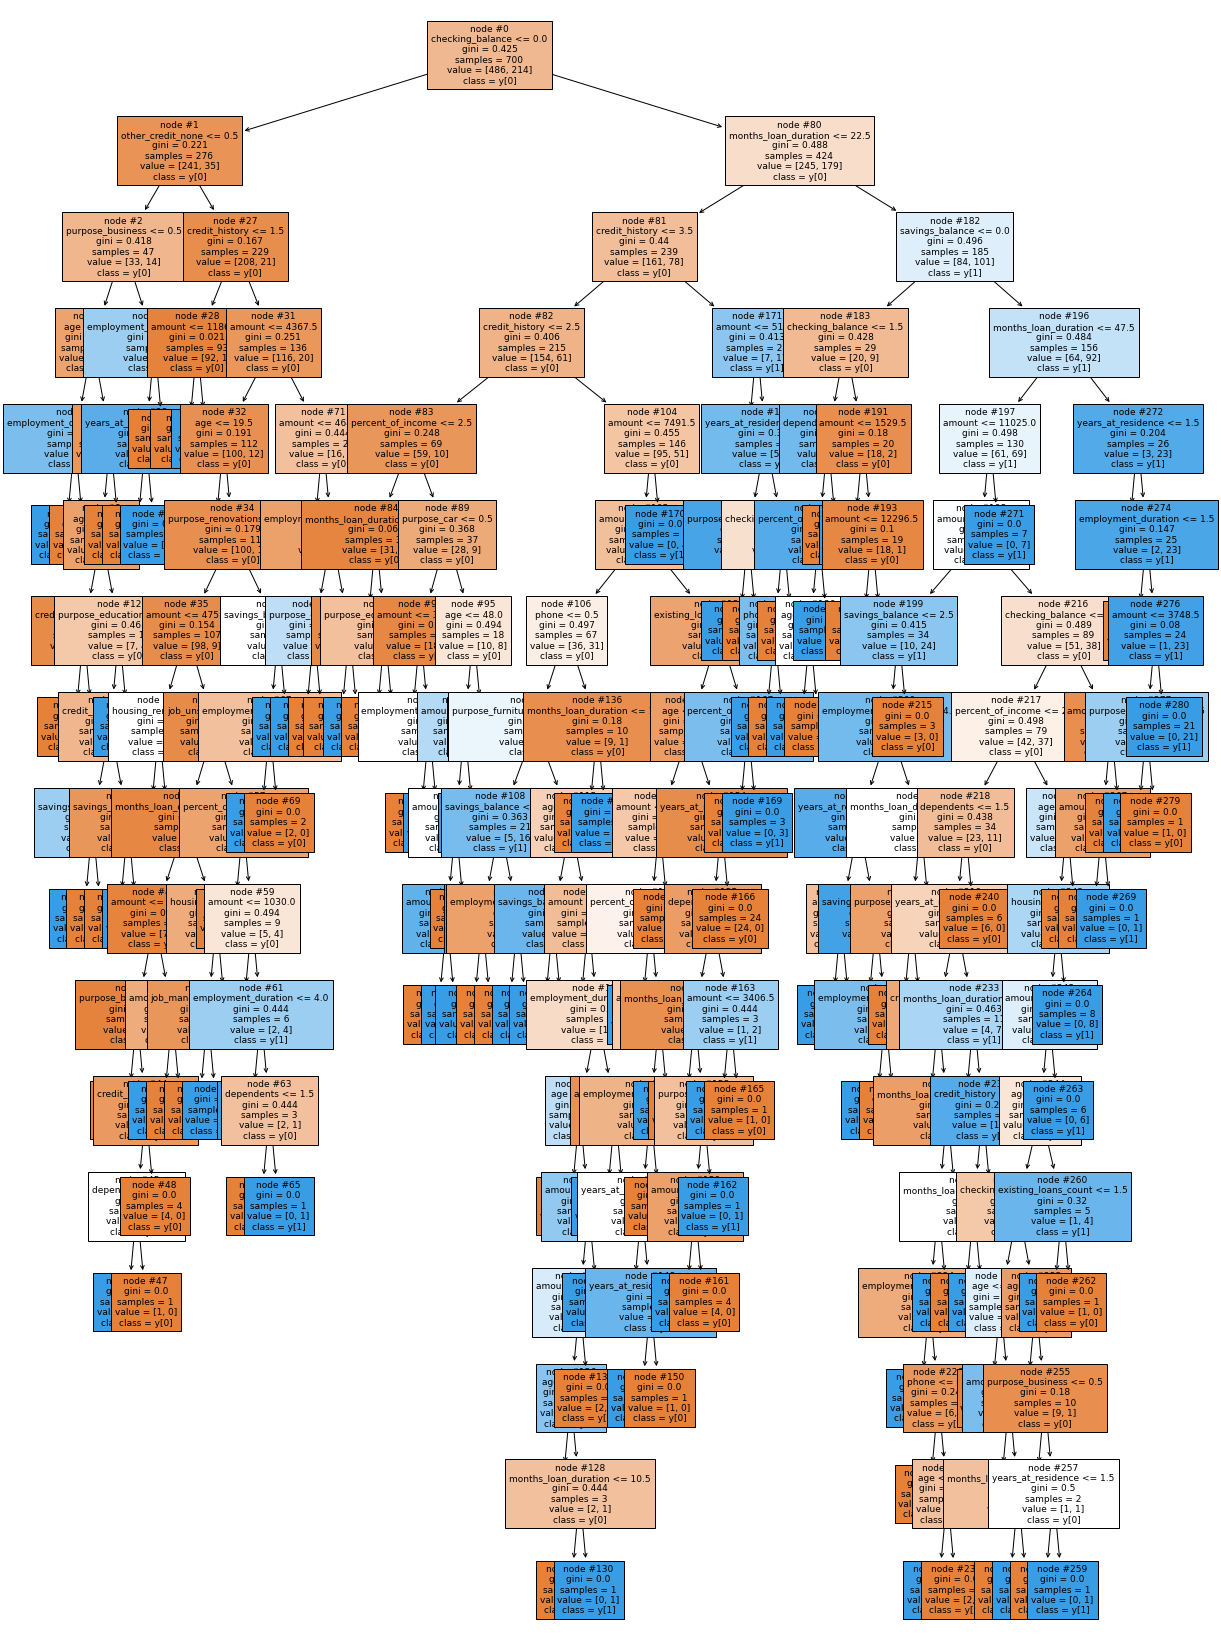

In [19]:
PlotTree(dTree)

In [20]:
print(tree.export_text(dTree, feature_names=feature_names, show_weights=True))

|--- checking_balance <= 0.00
|   |--- other_credit_none <= 0.50
|   |   |--- purpose_business <= 0.50
|   |   |   |--- age <= 25.50
|   |   |   |   |--- employment_duration <= 3.50
|   |   |   |   |   |--- weights: [0.00, 3.00] class: 1
|   |   |   |   |--- employment_duration >  3.50
|   |   |   |   |   |--- weights: [1.00, 0.00] class: 0
|   |   |   |--- age >  25.50
|   |   |   |   |--- age <= 38.50
|   |   |   |   |   |--- age <= 31.50
|   |   |   |   |   |   |--- credit_history <= 4.50
|   |   |   |   |   |   |   |--- weights: [13.00, 0.00] class: 0
|   |   |   |   |   |   |--- credit_history >  4.50
|   |   |   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |   |--- age >  31.50
|   |   |   |   |   |   |--- purpose_education <= 0.50
|   |   |   |   |   |   |   |--- credit_history <= 1.50
|   |   |   |   |   |   |   |   |--- savings_balance <= 2.50
|   |   |   |   |   |   |   |   |   |--- weights: [0.00, 2.00] class: 1
|   |   |   |   |   |   |   |   |--- sav

In [21]:
# importance of features in building a tree
# this is computed as the (normalised) total reduction of criterion brought by that feature.
# It is also known as the Gini importance.

def DisplayImportance(model):
    gini_importances = pd.DataFrame(dTree.feature_importances_, columns=["Imp"], index=x_train.columns).sort_values(by = "Imp")
    print(gini_importances)
    
DisplayImportance(dTree)

                                   Imp
job_skilled                   0.000000
other_credit_store            0.000000
other_credit_bank             0.000000
housing_own                   0.000000
housing_other                 0.000000
job_unemployed                0.000000
purpose_car0                  0.000000
job_unskilled                 0.002818
purpose_renovations           0.004489
job_management                0.005769
other_credit_none             0.011156
purpose_furniture/appliances  0.012421
existing_loans_count          0.013575
purpose_education             0.013767
housing_rent                  0.016646
phone                         0.016737
purpose_car                   0.021217
dependents                    0.023062
purpose_business              0.023784
percent_of_income             0.034128
years_at_residence            0.052719
savings_balance               0.057059
credit_history                0.065357
employment_duration           0.073225
months_loan_duration     

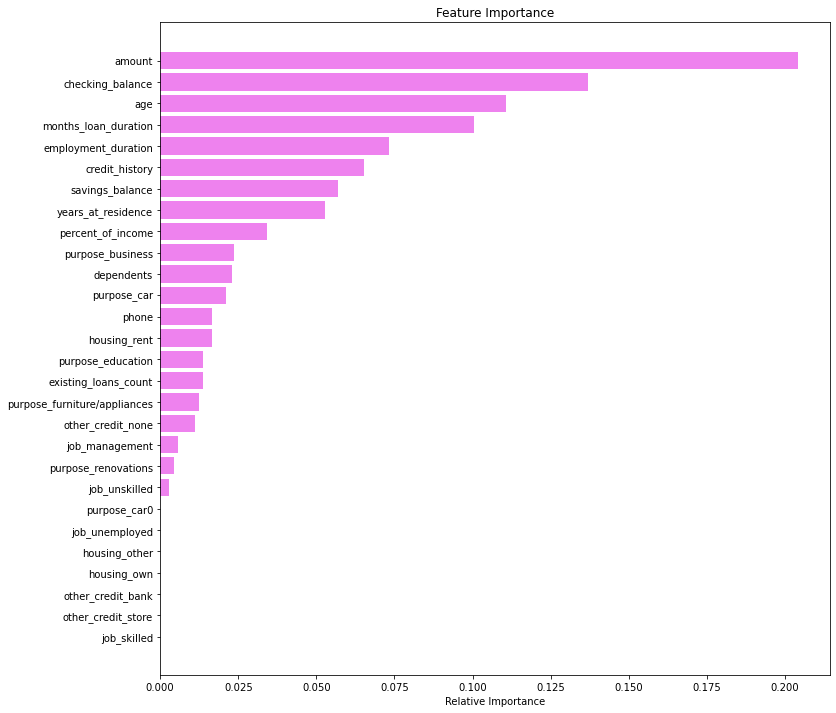

In [22]:
def DisplayImportanceChart(model):
    importances = model.feature_importances_
    indices = np.argsort(importances)

    plt.figure(figsize=(12, 12))
    plt.title('Feature Importance')
    plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
    plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
    plt.xlabel('Relative Importance')
    plt.show()
    
DisplayImportanceChart(dTree)

In [23]:
# Pre-Pruning
# Prevent the tree from branching on more than two layers

dTree1 = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=1)
dTree1.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=1)

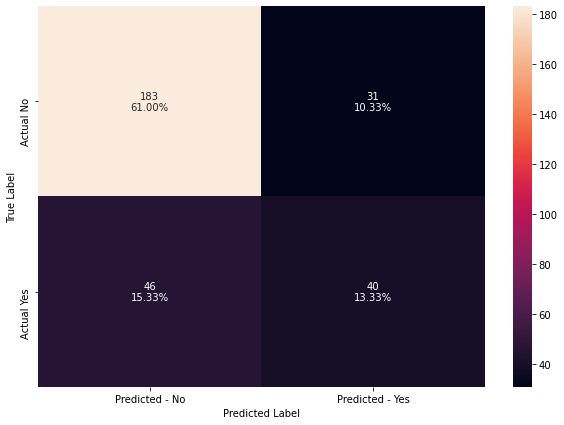

In [24]:
# Display Confusion Matrix of with with depth 3 restricted
DisplayConfusionMatrix(dTree1, y_test)

In [25]:
def DisplayScore(model):
    print(f"Training Score :{dTree1.score(x_train, y_train)}")
    print(f"Test Score : {dTree1.score(x_test, y_test)}")
    DisplayRecallScore(model)

GetMetricsScore(dTree1)

{'Accuracy_Test': 0.7433333333333333,
 'Accuracy_Train': 0.7528571428571429,
 'Recall_Test': 0.46511627906976744,
 'Recall_Train': 0.5373831775700935,
 'Precision_Test': 0.5633802816901409,
 'Precision_Train': 0.6084656084656085}

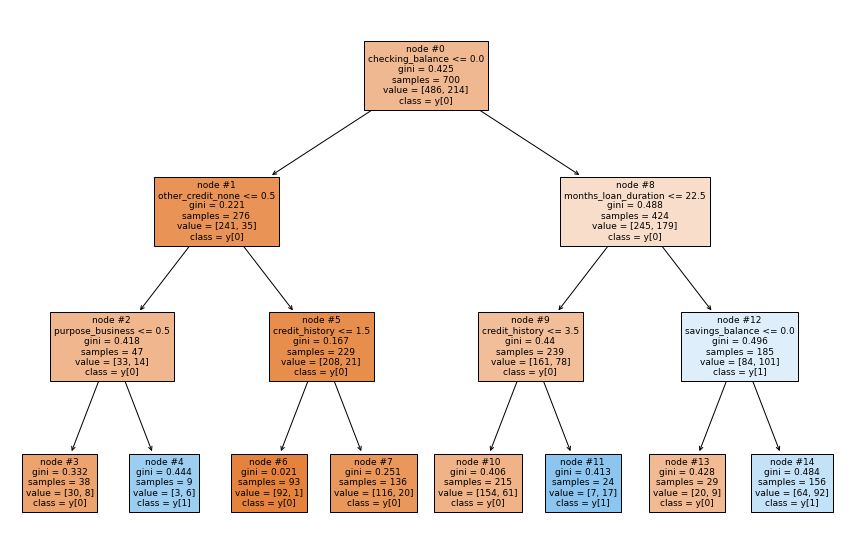

In [26]:
PlotTree(dTree1, [15, 10])

In [27]:
DisplayImportance(dTree1)

                                   Imp
job_skilled                   0.000000
other_credit_store            0.000000
other_credit_bank             0.000000
housing_own                   0.000000
housing_other                 0.000000
job_unemployed                0.000000
purpose_car0                  0.000000
job_unskilled                 0.002818
purpose_renovations           0.004489
job_management                0.005769
other_credit_none             0.011156
purpose_furniture/appliances  0.012421
existing_loans_count          0.013575
purpose_education             0.013767
housing_rent                  0.016646
phone                         0.016737
purpose_car                   0.021217
dependents                    0.023062
purpose_business              0.023784
percent_of_income             0.034128
years_at_residence            0.052719
savings_balance               0.057059
credit_history                0.065357
employment_duration           0.073225
months_loan_duration     

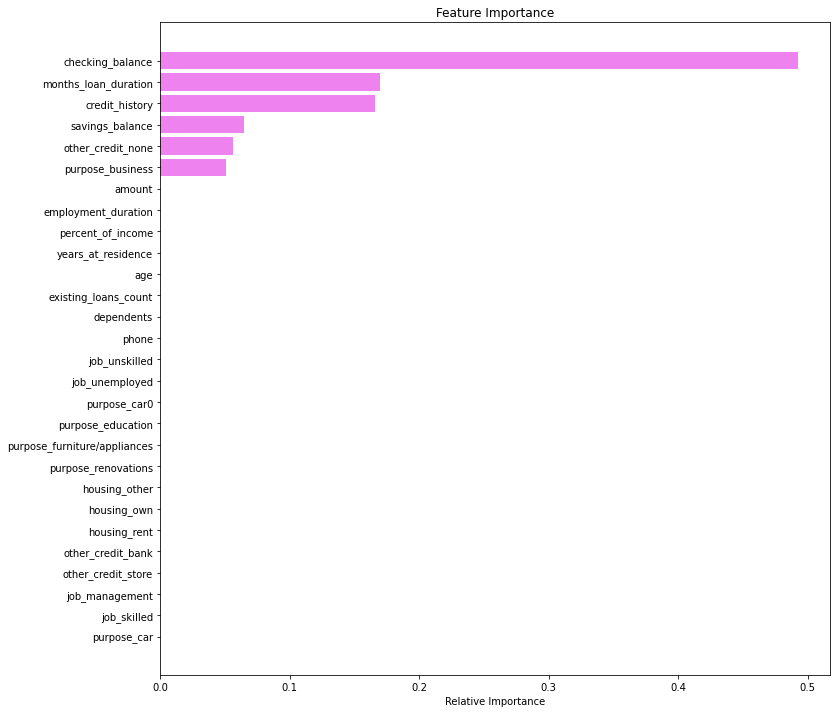

In [28]:
DisplayImportanceChart(dTree1)

####  <span style="font-family: Arial; font-weight:bold;font-size:1.9em;color:#0e92ea"> Compute GridSearch to find best pruning parameters

In [29]:

# choose the type of classifier
estimator = DecisionTreeClassifier(random_state=1)

# Grid of params to choose from
parameters = {
    "max_depth": np.arange(1, 10),
    "min_samples_leaf": [1, 2, 5, 7, 10, 15, 20],
    "max_leaf_nodes" : [2, 3, 5, 10],
    "min_impurity_decrease": [0.001, 0.01, 0.1]
}

# type of score used to compare paramter combinations
acc_scorer =metrics.make_scorer(metrics.recall_score)

# run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(x_train, y_train)

# set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# fit the best algorithm to the data
estimator.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=4, max_leaf_nodes=10,
                       min_impurity_decrease=0.001, min_samples_leaf=20,
                       random_state=1)

####  <span style="font-family: Arial; font-weight:bold;font-size:1.9em;color:#0e92ea"> Confusion Metrix with tuned tree

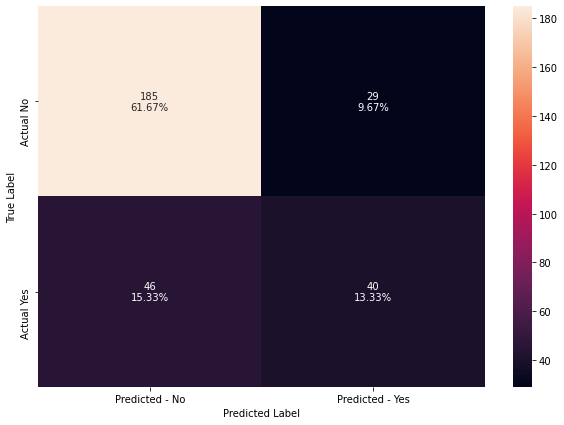

In [30]:
DisplayConfusionMatrix(estimator, y_test)

In [31]:
GetMetricsScore(estimator)

{'Accuracy_Test': 0.75,
 'Accuracy_Train': 0.7485714285714286,
 'Recall_Test': 0.46511627906976744,
 'Recall_Train': 0.5093457943925234,
 'Precision_Test': 0.5797101449275363,
 'Precision_Train': 0.6055555555555555}

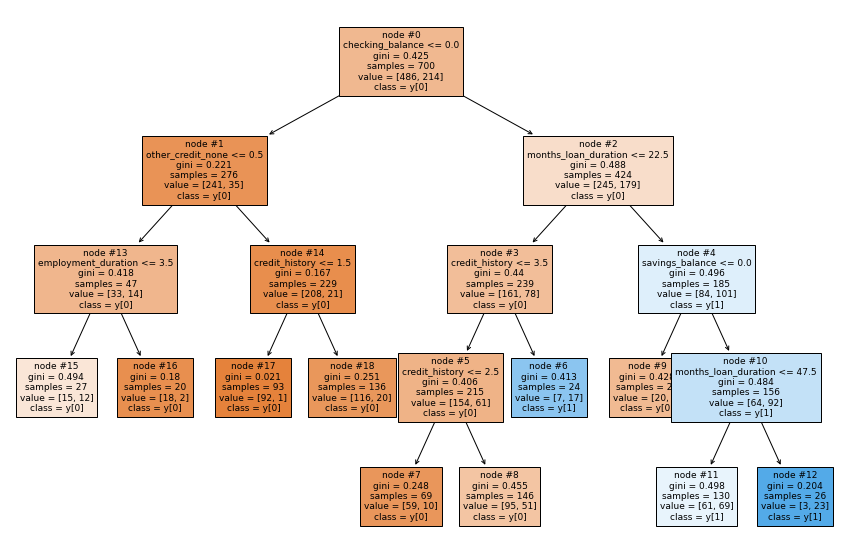

In [32]:
PlotTree(estimator, [15, 10])

####  <span style="font-family: Arial; font-weight:bold;font-size:1.9em;color:#0e92ea"> Cost Complexity Prunning, Total Impurity of leaves vs effective alphas of pruned tree</span>
<ul>
    <li>
        Defined by the ccp_alpha parameter of DecisionTreeClassifier() constructor.
        larger values of ccp_alpha increases the number of nodes pruned.
    </li>
     <li>
         Nodes with smallest alpha are pruned first.
    </li>
    <li>
        The more the alpha increases,the more the nodes that are pruned,and the higher the impurity of the tree.
    </li>
</ul>

In [33]:
clf = DecisionTreeClassifier(random_state=1)
path = clf.cost_complexity_pruning_path(x_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [34]:
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.000000,0.000000
1,0.000940,0.002819
2,0.001224,0.005268
3,0.001250,0.007768
4,0.001250,0.010268
...,...,...
73,0.005618,0.335998
74,0.007117,0.357350
75,0.011122,0.368471
76,0.014366,0.382838


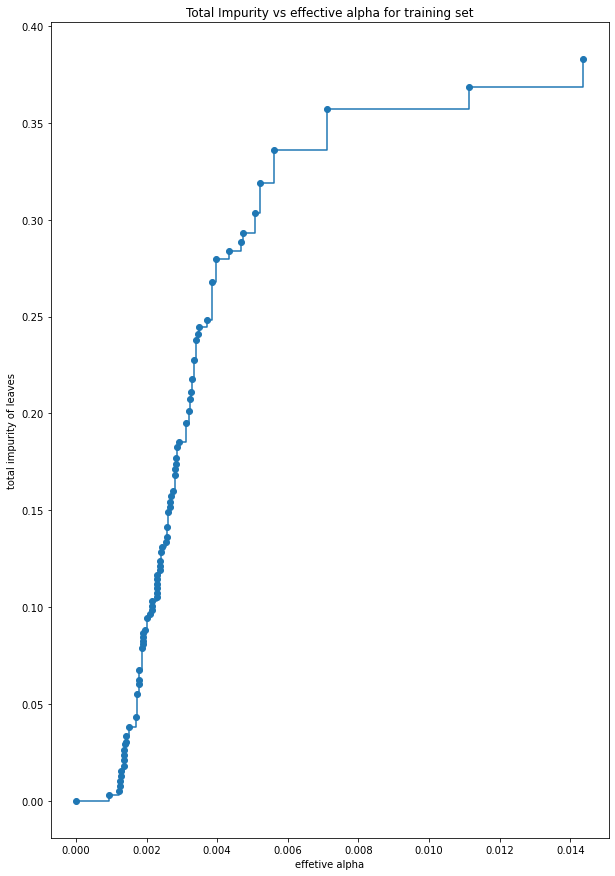

In [35]:
fig, ax = plt.subplots(figsize=(10, 15))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle='steps-post')
ax.set_xlabel('effetive alpha')
ax.set_ylabel('total impurity of leaves')
ax.set_title('Total Impurity vs effective alpha for training set')
plt.show()

In [36]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha)
    clf.fit(x_train, y_train)
    clfs.append(clf)

for clf, ccp_alpha in zip(clfs, ccp_alphas):
    print("Number of Nodesin the last tree is: {} with ccp_alpha: {}".format(clf.tree_.node_count, ccp_alpha))

Number of Nodesin the last tree is: 281 with ccp_alpha: 0.0
Number of Nodesin the last tree is: 275 with ccp_alpha: 0.0009395109395109381
Number of Nodesin the last tree is: 271 with ccp_alpha: 0.0012244897959183675
Number of Nodesin the last tree is: 263 with ccp_alpha: 0.00125
Number of Nodesin the last tree is: 263 with ccp_alpha: 0.00125
Number of Nodesin the last tree is: 255 with ccp_alpha: 0.001285714285714286
Number of Nodesin the last tree is: 255 with ccp_alpha: 0.001285714285714286
Number of Nodesin the last tree is: 251 with ccp_alpha: 0.0013533834586466173
Number of Nodesin the last tree is: 247 with ccp_alpha: 0.0013571428571428567
Number of Nodesin the last tree is: 243 with ccp_alpha: 0.00136904761904762
Number of Nodesin the last tree is: 239 with ccp_alpha: 0.0013746163746163745
Number of Nodesin the last tree is: 235 with ccp_alpha: 0.0013839285714285713
Number of Nodesin the last tree is: 229 with ccp_alpha: 0.0014285714285714286
Number of Nodesin the last tree is: 

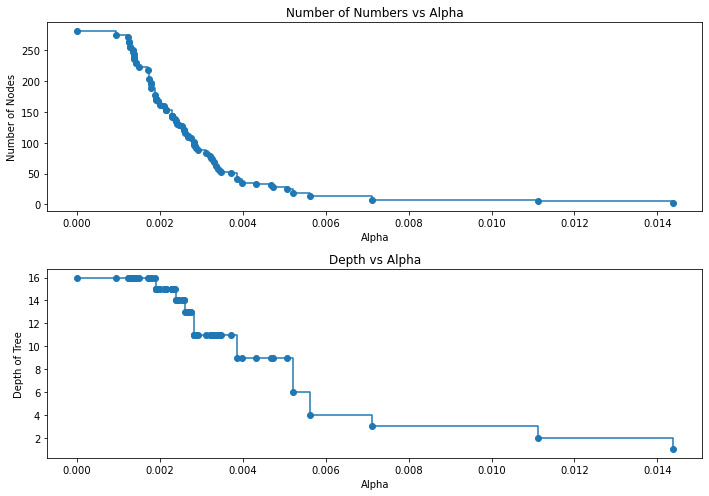

In [37]:
clfs       = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
fig, ax =plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("Alpha")
ax[0].set_ylabel("Number of Nodes")
ax[0].set_title("Number of Numbers vs Alpha")


depth = [clf.tree_.max_depth for clf in clfs]
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("Alpha")
ax[1].set_ylabel("Depth of Tree")
ax[1].set_title("Depth vs Alpha")

fig.tight_layout()

In [38]:
train_scores = [clf.score(x_train, y_train) for clf in clfs]
test_scores = [clf.score(x_test, y_test) for clf in clfs]

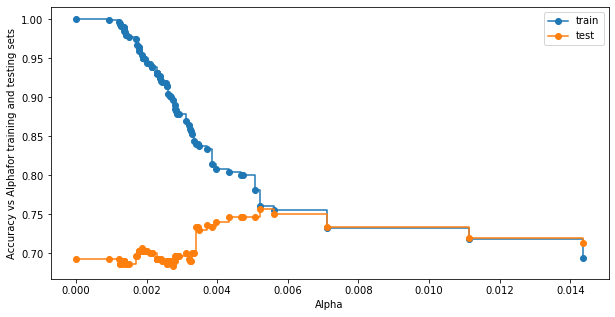

In [39]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.set_xlabel('Alpha')
ax.set_ylabel('Accuracy vs Alphafor training and testing sets')
ax.plot(ccp_alphas, train_scores, marker='o', label='train', drawstyle='steps-post')
ax.plot(ccp_alphas, test_scores, marker='o', label='test', drawstyle='steps-post')
ax.legend()
plt.show()

In [40]:
index_best_model = np.argmax(test_scores)
best_model       = clfs[index_best_model]

GetMetricsScore(best_model)

{'Accuracy_Test': 0.7566666666666667,
 'Accuracy_Train': 0.7614285714285715,
 'Recall_Test': 0.5232558139534884,
 'Recall_Train': 0.5607476635514018,
 'Precision_Test': 0.5844155844155844,
 'Precision_Train': 0.6217616580310881}

In [41]:
recall_train = []
for clf in clfs:
    pred_train3    = clf.predict(x_train)
    values_train  = metrics.recall_score(y_train, pred_train3)
    recall_train.append(values_train)

In [42]:
recall_test = []
for clf in clfs:
    pred_test3    = clf.predict(x_test)
    values_test  = metrics.recall_score(y_test, pred_test3)
    recall_test.append(values_test)

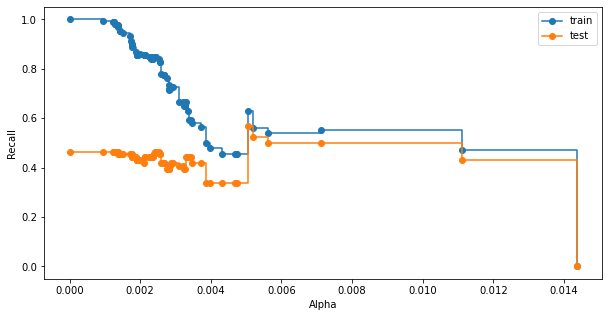

In [43]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.set_xlabel('Alpha')
ax.set_ylabel('Recall')
ax.plot(ccp_alphas, recall_train, marker='o', label='train', drawstyle='steps-post')
ax.plot(ccp_alphas, recall_test, marker='o', label='test', drawstyle='steps-post')
ax.legend()
plt.show()

In [44]:
index_best_model = np.argmax(recall_test)
best_model =clfs[index_best_model]
GetMetricsScore(best_model)

{'Accuracy_Test': 0.7466666666666667,
 'Accuracy_Train': 0.7814285714285715,
 'Recall_Test': 0.5697674418604651,
 'Recall_Train': 0.6308411214953271,
 'Precision_Test': 0.5568181818181818,
 'Precision_Train': 0.645933014354067}

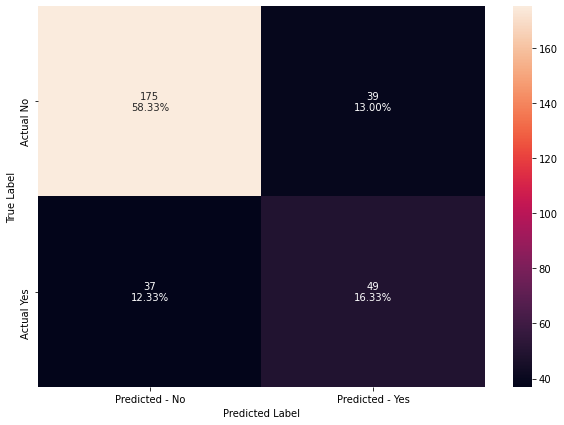

In [45]:
DisplayConfusionMatrix(best_model, y_test)

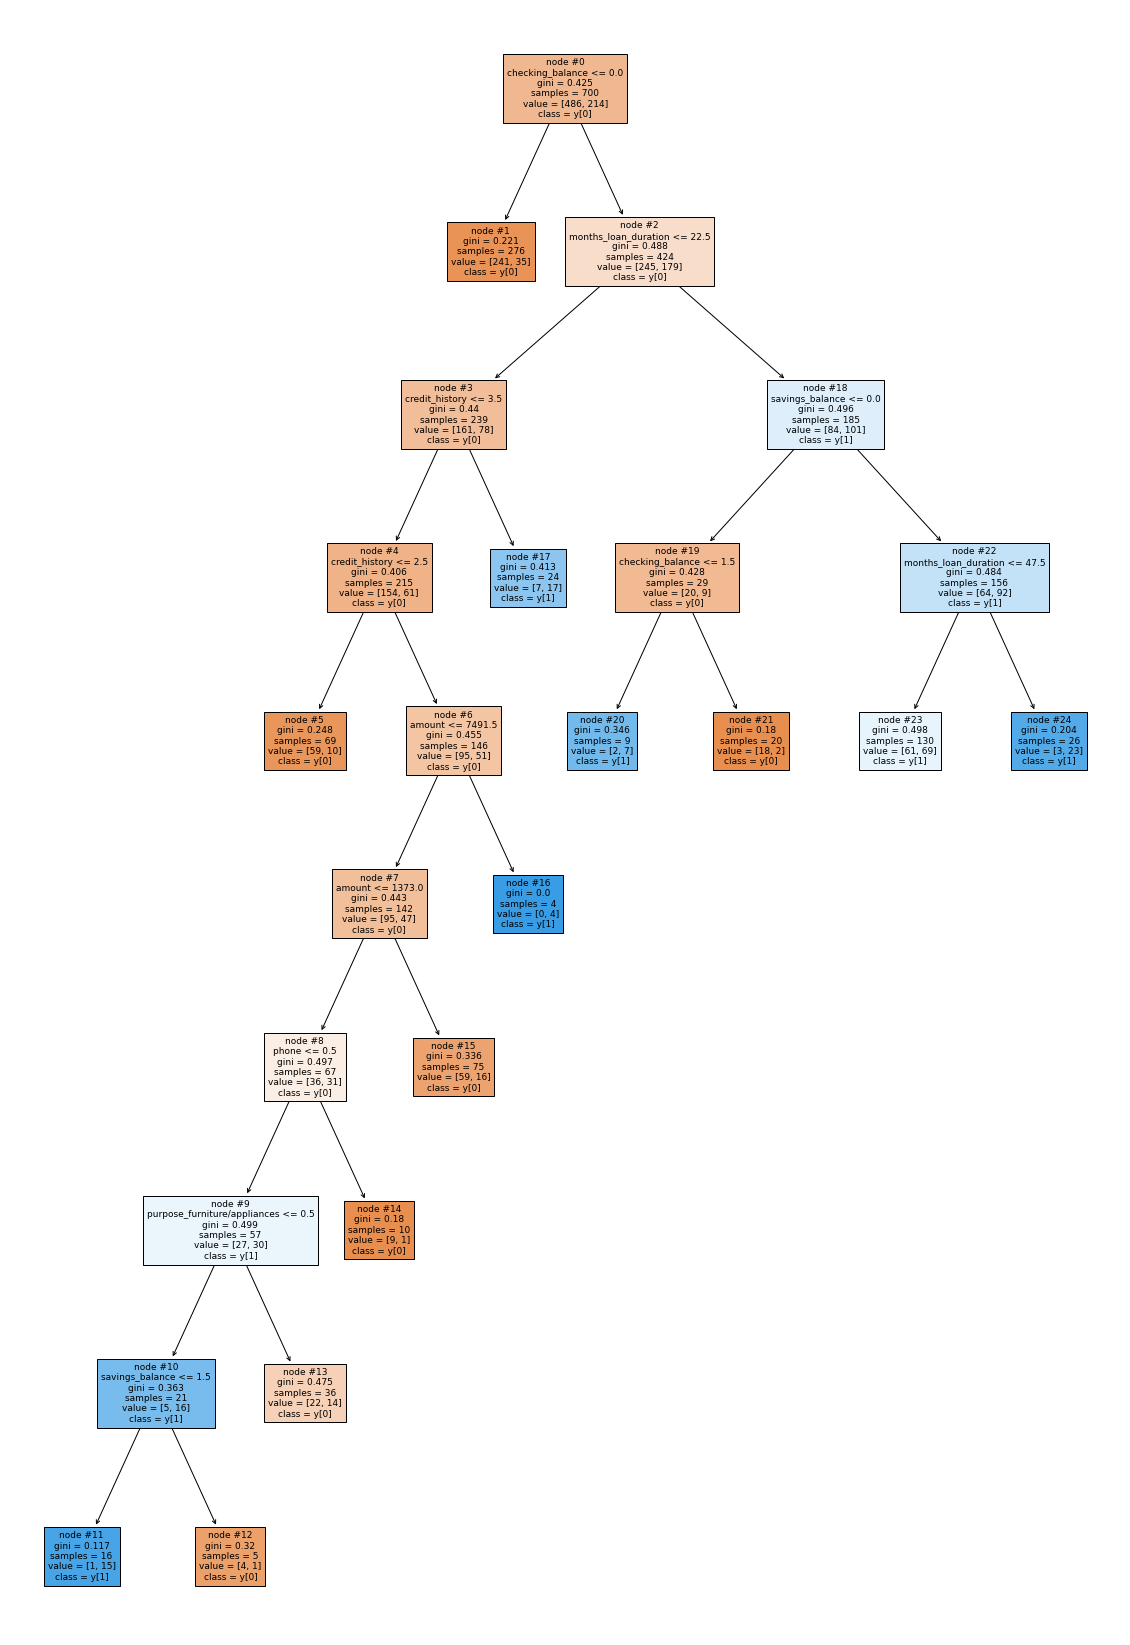

In [46]:
PlotTree(best_model)